In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
%timeit [i+1 for i in range(1000)]  # run a line 1000 time and display the average time it took 

35.6 µs ± 1.8 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
help(untar_data)  ### Union inseamna ori/sau/una din ele

Help on function untar_data in module fastai.datasets:

untar_data(url: str, fname: Union[pathlib.Path, str] = None, dest: Union[pathlib.Path, str] = None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [6]:
path = untar_data(URLs.PETS)

In [7]:
path

PosixPath('/home/john/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls() # list directories

[PosixPath('/home/john/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images')]

In [9]:
path_anno = path/'annotations' # concatenation
path_img = path/'images'

In [10]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images/Birman_115.jpg'),
 PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images/leonberger_142.jpg'),
 PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images/Bombay_68.jpg'),
 PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images/japanese_chin_26.jpg'),
 PosixPath('/home/john/.fastai/data/oxford-iiit-pet/images/saint_bernard_149.jpg')]

In [11]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [12]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path: Union[pathlib.Path, str], fnames: Collection[pathlib.Path], pat: str, valid_pct: float = 0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [13]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224) ###!!! Use 224 square
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Birman,leonberger,Bombay,Ragdoll,japanese_chin
Path: /home/john/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yorkshire_terrier,Sphynx,japanese_chin,Persian,Maine_Coon
Path: /home/john/.fastai/data/oxford-iiit-pet/images;

Test: None

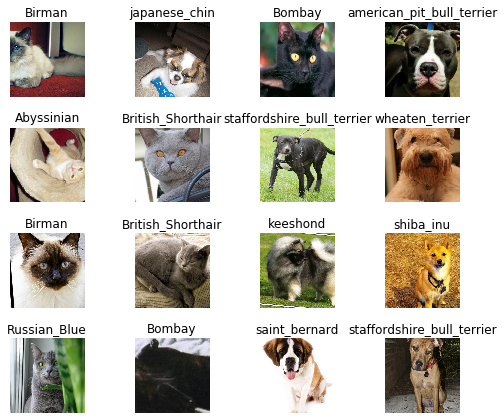

In [14]:
data.show_batch(rows=4, figsize=(7,6))

In [15]:
print(data.classes)
len(data.classes), data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [16]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate) # transfer learning 1/1000 faster that regular training, 

In [17]:
#learn.fit_one_cycle(1)